In [39]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
def func1(x):
    return -5 * x ** 5 + 4 * x ** 4 - 12 * x ** 3 + 11 * x ** 2 - 2 * x + 1


def func2(x):
    return math.log10(x - 2) ** 2 + math.log10(10 - x) ** 2 - x ** 0.2


def func3(x):
    return -3 * x * math.sin(0.75 * x) + math.exp(-2 * x)


def func4(x):
    return math.exp(3 * x) + 5 * math.exp(-2 * x)


def func5(x):
    return 0.2 * x * math.log10(x) + (x - 2.3) ** 2


epsilon = 0.0001

In [3]:
func_calls_count = 0
intervals = []
dots = []

In [84]:
def find_min_dichotomy(func, a, b, epsilon):
    global func_calls_count, intervals, dots
    
    func_calls_count = 0
    intervals = []
    dots = []
    
    while (b - a) > epsilon:
        intervals.append((a, b))
        
        middle = (a + b) / 2
        
        x1 = middle - epsilon / 2.5
        x2 = middle + epsilon / 2.5
        val1 = func(x1)
        val2 = func(x2)
        
        func_calls_count += 2
        dots.append([(x1, val1), (x2, val2)])
        
        if val1 == val2:
            a = x1
            b = x2
        if val1 < val2:
            b = x2
        if val2 < val1:
            a = x1
    
    intervals.append((a, b))
    dots.append([])

    return (a + b) / 2

In [85]:
def find_min_golden_ratio(func, a, b, epsilon):
    global func_calls_count, intervals, dots
    
    x1 = a + ((3 - math.sqrt(5)) / 2) * (b - a)
    x2 = b - ((3 - math.sqrt(5)) / 2) * (b - a)
    val1 = func(x1)
    val2 = func(x2)
    
    func_calls_count = 2
    intervals = []
    dots = []
    
    while (b - a) > epsilon:
        intervals.append((a, b))
        dots.append([(x1, val1), (x2, val2)])

        if val1 == val2:
            a = x1
            b = x2
            x1 = a + ((3 - math.sqrt(5)) / 2) * (b - a)
            x2 = b - ((3 - math.sqrt(5)) / 2) * (b - a)
            val1 = func(x1)
            val2 = func(x2)
            func_calls_count += 2

        if val2 < val1:
            a = x1
            x1 = x2
            x2 = b - ((3 - math.sqrt(5)) / 2) * (b - a)
            val1 = val2
            val2 = func(x2)
            func_calls_count += 1
            
        if val1 < val2:
            b = x2
            x2 = x1
            x1 = a + ((3 - math.sqrt(5)) / 2) * (b - a)
            val2 = val1
            val1 = func(x1)
            func_calls_count += 1

    intervals.append((a, b))
    dots.append([])
    
    return (a + b) / 2

In [86]:
fib_buf = [1, 1]


def fib(n):
    if n < 0:
        raise ValueError()

    if n < len(fib_buf):
        return fib_buf[n]

    v = fib(n - 1) + fib(n - 2)
    fib_buf.append(v)
    return v


def find_min_fibonacci(func, a, b, epsilon):
    global func_calls_count, intervals, dots
    
    fn = (b - a) / epsilon

    n = 2
    while fib(n) < fn:
        n += 1

    x1 = a + fib(n - 2) / fib(n) * (b - a)
    x2 = a + fib(n - 1) / fib(n) * (b - a)
    val1 = func(x1)
    val2 = func(x2)
    
    func_calls_count = 2
    intervals = []
    dots = []

    while n > 2:
        n -= 1
        
        intervals.append((a, b))
        dots.append([(x1, val1), (x2, val2)])

        if val1 > val2:
            a = x1

            x1 = x2
            x2 = a + fib(n - 1) / fib(n) * (b - a)

            val1 = val2
            val2 = func(x2)
        else:
            b = x2

            x2 = x1
            x1 = a + fib(n - 2) / fib(n) * (b - a)

            val2 = val1
            val1 = func(x1)
        
        func_calls_count += 1
    
    intervals.append((a, b))
    dots.append([])

    return (a + b) / 2

In [7]:
def find_min_parabola(func, left, right, epsilon=0.0005):
    global func_calls_count, intervals, dots
    
    x1, x2, x3 = left, (left + right) / 2, right
    f1, f2, f3 = func(x1), func(x2), func(x3)
    
    func_calls_count = 3
    intervals = []
    dots = []

    while abs(x3 - x1) >= epsilon:
        u = x2 -\
            ((x2 - x1) ** 2 * (f2 - f3) - (x2 - x3) ** 2 * (f2 - f1)) /\
            2 / ((x2 - x1) * (f2 - f3) - (x2 - x3) * (f2 - f1))
        fu = func(u)
        
        func_calls_count += 1
        intervals.append((x1, x3))
        dots.append([(u, fu)])

        if fu <= f2:
            if u <= x2:
                x3, f3 = x2, f2
            else:
                x1, f1 = x2, f2
            x2, f2 = u, fu
        else:
            if u <= x2:
                x1, f1 = u, fu
            else:
                x3, f3 = u, fu
    
    intervals.append((x1, x3))
    dots.append([])

    return (x1 + x3) / 2

In [8]:
K = (3 - math.sqrt(5)) / 2


def _sign(x):
    return math.copysign(1, x)


def find_min_brent(func, left, right, epsilon=0.0005):
    global func_calls_count, intervals, dots
    
    a, c = left, right
    x = w = v = a + K * (c - a)
    fx = fw = fv = func(x)
    d = e = c - a
    
    func_calls_count = 1
    intervals = []
    dots = []

    while abs(x - (a + c) / 2) + (c - a) / 2 >= 2 * epsilon:
        g = e
        e = d

        u = None

        # Параболлическая аппроксимация
        # x, w, v - разные и fx, fw, fv - разные
        if x != w and x != v and w != v and fx != fw and fx != fv and fw != fw:
            u_temp = x - \
                ((x - w) ** 2 * (fx - fv) - (x - v) ** 2 * (fx - fw)) / \
                2 / ((x - w) * (fx - fv) - (x - v) * (fx - fw))

            if a + epsilon <= u_temp <= c - epsilon and abs(u_temp - x) < g / 2:
                u = u_temp

        # Золотое сечение
        if u is None:
            if x < (a + c) / 2:
                u = x + K * (c - x)
                e = c - x
            else:
                u = x - K * (x - a)
                e = x - a

        if abs(u - x) < epsilon:
            u = x + _sign(u - x) * epsilon

        d = abs(u - x)
        fu = func(u)
        
        func_calls_count += 1
        intervals.append((a, c))
        dots.append([(u, fu)])

        if fu <= fx:
            if u >= x:
                a = x
            else:
                c = x

            v, fv = w, fw
            w, fw = x, fx
            x, fx = u, fu
        else:
            if u >= x:
                c = u
            else:
                a = u

            if fu <= fw or w == x:
                v, fv = w, fw
                w, fw = u, fu
            elif fu <= fv or v == x or v == w:
                v, fv = u, fu
    
    intervals.append((a, c))
    dots.append([])

    return x

In [97]:
def export_csv(name):
    data = []
    for i in range(len(intervals)):
        dots_str = [str(dot) for dot in dots[i]]
        data.append([i + 1, str(intervals[i]), ', '.join(dots_str)])
    df = pd.DataFrame(data, columns=['', 'Интервал', 'Точки'])
    df.to_csv(f'{name}.csv', index=False)


def draw_plot(title, find_min_func, func, left, right):
    x = []
    y = []
    for i in np.arange(-10, 0, 0.0001):
        find_min_func(func, left, right, epsilon=math.exp(i))
        x.append(i)
        y.append(func_calls_count)
    plt.title(title)
    plt.xlabel('ln(epsilon)')
    plt.ylabel('function calls count')
    plt.plot(x, y)
    plt.show()

dichotomy 32


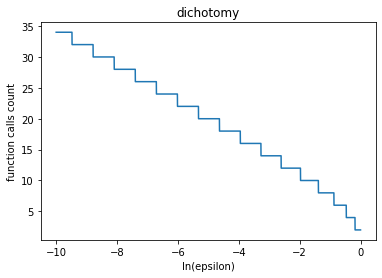

golden_ratio 23


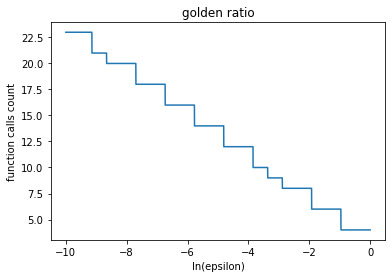

fibonacci 20


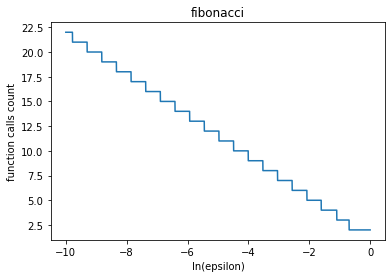

parabola 21


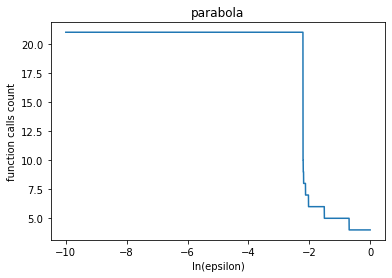

brent 18


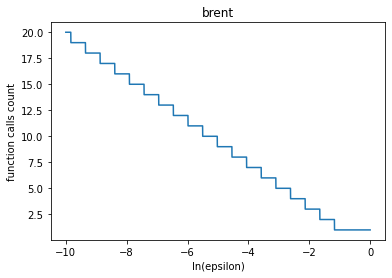

In [98]:
func, left, right = func1, -0.5, 0.5

find_min_func = find_min_dichotomy
result = find_min_func(func, left, right, epsilon=epsilon)
print('dichotomy', func_calls_count)
export_csv('dichotomy')
draw_plot('dichotomy', find_min_func, func, left, right)

find_min_func = find_min_golden_ratio
result = find_min_func(func, left, right, epsilon=epsilon)
print('golden_ratio', func_calls_count)
export_csv('golden_ratio')
draw_plot('golden ratio', find_min_func, func, left, right)

find_min_func = find_min_fibonacci
result = find_min_func(func, left, right, epsilon=epsilon)
print('fibonacci', func_calls_count)
export_csv('fibonacci')
draw_plot('fibonacci', find_min_func, func, left, right)

find_min_func = find_min_parabola
result = find_min_func(func, left, right, epsilon=epsilon)
print('parabola', func_calls_count)
export_csv('parabola')
draw_plot('parabola', find_min_func, func, left, right)

find_min_func = find_min_brent
result = find_min_func(func, left, right, epsilon=epsilon)
print('brent', func_calls_count)
export_csv('brent')
draw_plot('brent', find_min_func, func, left, right)